In [2]:
# Load convolve_im_freq from freq_1.ipynb 
from IPython.display import clear_output
%run -n freq_1.ipynb 
clear_output(wait=False) 

import os
import numpy as np
import utils
import matplotlib.pyplot as plt 

In [3]:
def convolve_im_freq(
    im: np.array,
    fft_kernel: np.array,
    verbose=True
):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    F = np.fft.fft2(im)
    H = fft_kernel
    G = F * H
    conv_result = np.fft.ifft2(G).real
    
    FFT_kernel = np.fft.fftshift(H)
    FFT_image = np.fft.fftshift(F)
    Filtered_FFT_image = np.fft.fftshift(G)
    
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.title("Original Image")

        plt.subplot(1, 5, 2) 
        # Visualize FFT
        plt.imshow(np.log1p(np.abs(FFT_image)), cmap="gray")
        plt.title("FFT Image")
        
        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.imshow(np.log1p(np.abs(FFT_kernel)), cmap="gray")
        plt.title("FFT Kernel")
        
        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.imshow(np.log1p(np.abs(Filtered_FFT_image)), cmap="gray")
        plt.title("Filtered FFT Image")
        
        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")
    
    return conv_result

In [105]:
def create_kernel(im):
    """
    Creates a filter kernel in the frequency domain.

    Args:
        im: np.array of shape [H, W]
    Returns:
        kernel: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    kernel = np.ones_like((im))
    H, W = im.shape
    H_center, W_center = H // 2, W // 2
    kernel[H_center-8:H_center+8, :] = 0
    kernel[:, W_center-28:W_center+28] = 1
    kernel = np.fft.fftshift(kernel)

    ### END YOUR CODE HERE ###
    return kernel

Saving image to: image_processed\moon_filtered.png


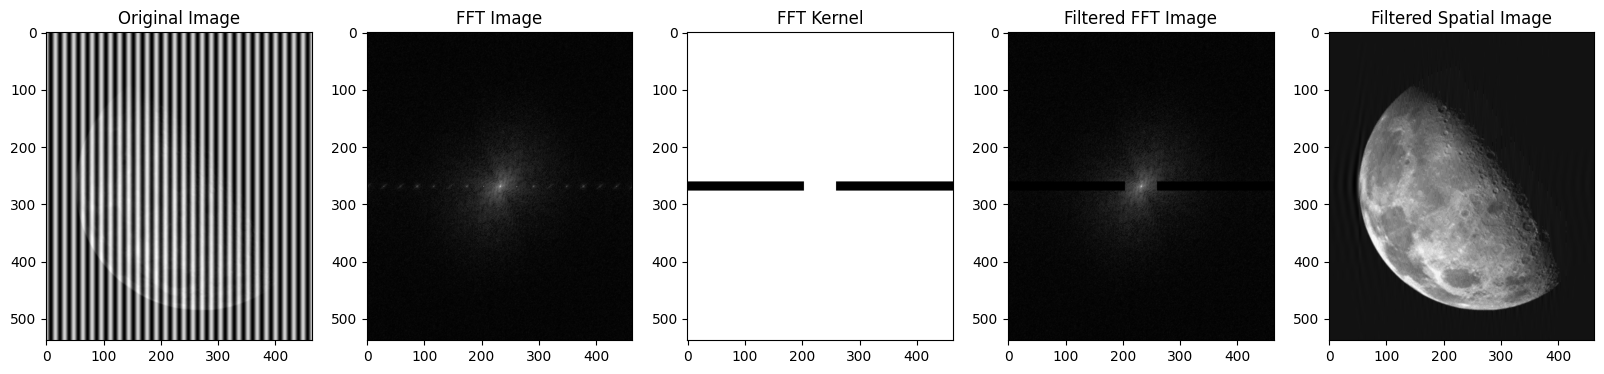

In [106]:
if __name__ == "__main__":
    # Changing this code should not be needed!
    
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    kernel = create_kernel(im)        
    # Note that this function is from your own implementation of convolve_im_freq from freq_1.ipynb
    im_filtered = convolve_im_freq(im, kernel, True) 
    
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))